In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
with np.load('mnist.npz') as data: #mannualy downloaded the mnist dataset as it was showing url failure 
    x_train = data['x_train']
    y_train = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0].shape

(28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

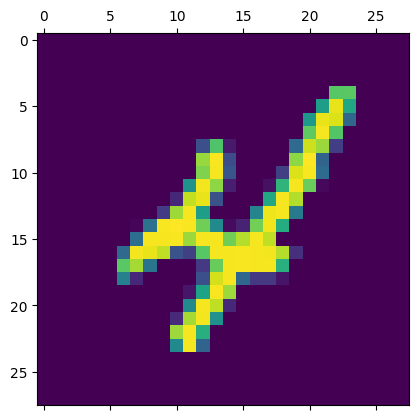

In [7]:
plt.matshow(x_train[9])

In [8]:
y_train[9]

4

In [9]:
#scaling the dataset to increase the accuracy score
x_train = x_train/255
x_test = x_test/255

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened  = x_test.reshape(len(x_test),28*28)

In [12]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)

model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 290us/step - loss: 0.4720 - accuracy: 0.8769
Epoch 2/5
1875/1875 [==============================] - 1s 288us/step - loss: 0.3042 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 1s 284us/step - loss: 0.2836 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 1s 286us/step - loss: 0.2734 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 1s 286us/step - loss: 0.2669 - accuracy: 0.9259


In [14]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 256us/step - loss: 0.2673 - accuracy: 0.9271


[0.2673462927341461, 0.9271000027656555]

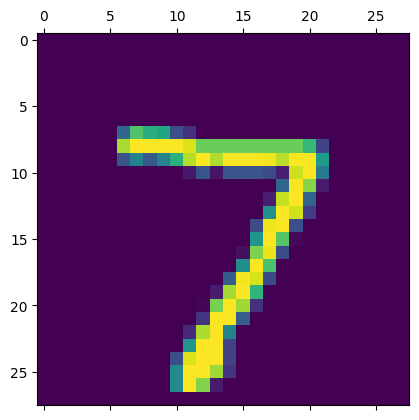

In [15]:
plt.matshow(x_test[0])

In [16]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 226us/step


array([3.1564180e-02, 3.1167838e-07, 6.4292535e-02, 9.4775331e-01,
       1.9737892e-03, 1.1927309e-01, 1.3351886e-06, 9.9985826e-01,
       1.0509697e-01, 6.8188632e-01], dtype=float32)

In [17]:
np.argmax(y_predicted[0]) #it will find the max value and print the index of the value

7

In [18]:
#did this to convert all predcitons in discrete one digits which we did in above code
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [19]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [20]:
cm = tf.math.confusion_matrix(labels= y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    1,    3,    0,    7,    5,    3,    2,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   5,    9,  922,   16,    6,    6,   12,   11,   40,    5],
       [   4,    0,   21,  908,    0,   33,    2,   11,   22,    9],
       [   1,    1,    3,    2,  900,    0,   11,    4,    9,   51],
       [   9,    2,    3,   19,    8,  794,   11,    5,   33,    8],
       [  11,    3,    6,    1,    7,   17,  909,    2,    2,    0],
       [   1,    5,   22,    6,    3,    1,    0,  954,    3,   33],
       [   6,    7,    7,   14,    9,   23,    8,   12,  879,    9],
       [  11,    7,    1,    7,   14,    7,    0,   22,    7,  933]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

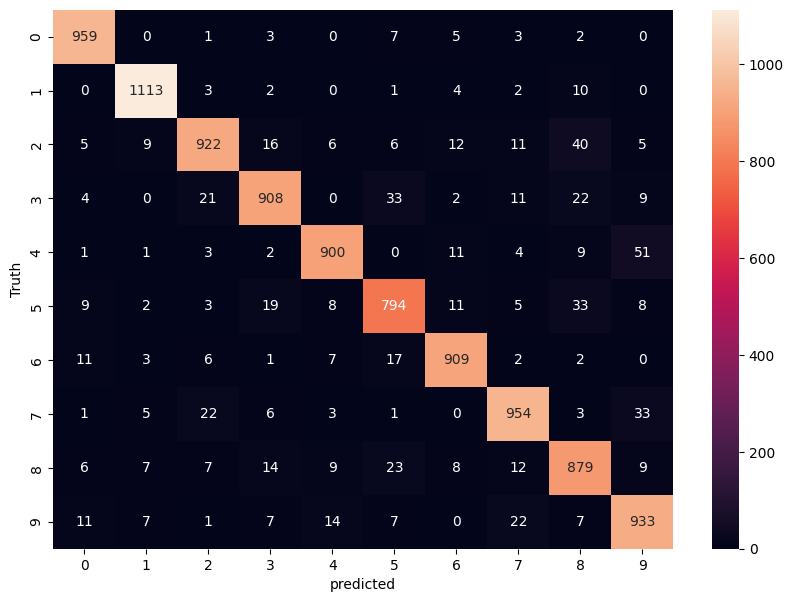

In [21]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [22]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid'),
    
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)

model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 438us/step - loss: 0.2737 - accuracy: 0.9218
Epoch 2/5
1875/1875 [==============================] - 1s 448us/step - loss: 0.1231 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 1s 476us/step - loss: 0.0859 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 1s 440us/step - loss: 0.0656 - accuracy: 0.9792
Epoch 5/5
1875/1875 [==============================] - 1s 440us/step - loss: 0.0513 - accuracy: 0.9845


In [23]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 307us/step - loss: 0.0856 - accuracy: 0.9741


[0.08563831448554993, 0.9740999937057495]

313/313 [==============================] - 0s 252us/step


Text(95.72222222222221, 0.5, 'Truth')

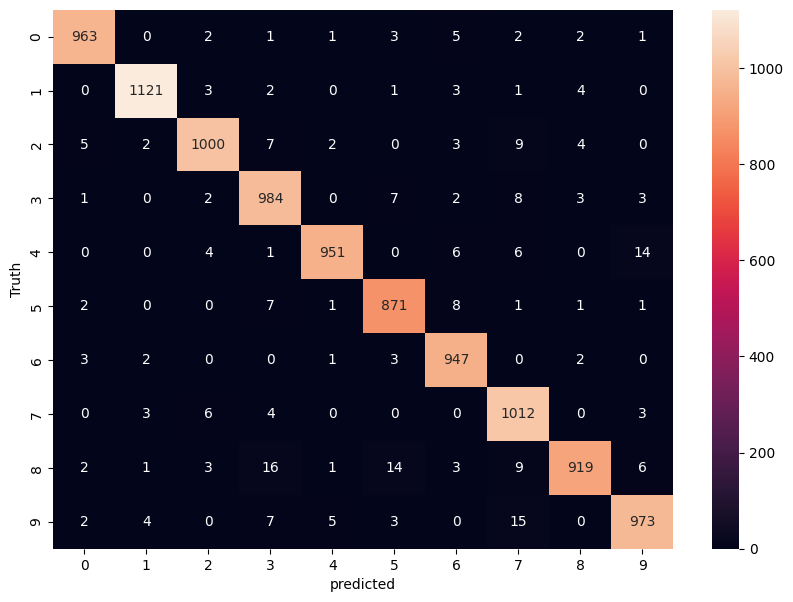

In [24]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels= y_test,predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('Truth')